In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VEERANNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VEERANNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VEERANNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('flipitnews-data.csv') 


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (2225, 2)


Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


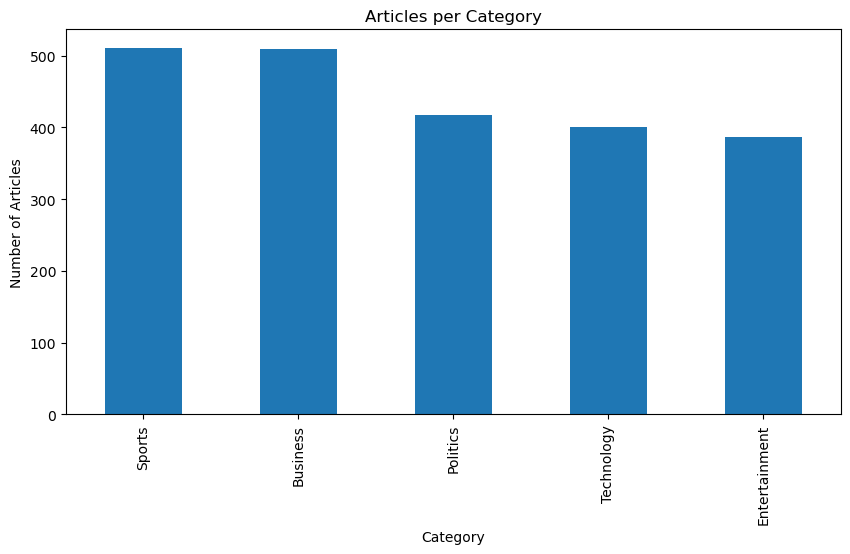

In [4]:
# Distribution of news articles per category
print(df['Category'].value_counts())
df['Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Articles per Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

In [5]:
# Processing Textual Data
def preprocess_text(text):
    # Keep only letters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into string
    return ' '.join(tokens)


In [6]:
print("Before Processing:\n", df['Article'][0])
print("\nAfter Processing:\n", preprocess_text(df['Article'][0]))


Before Processing:
 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bei

In [7]:
df['Processed_Article'] = df['Article'].apply(preprocess_text)


In [8]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordclouds_by_category(df, category_col='Category', text_col='Processed_Article', top_n=10):
    categories = df[category_col].unique()
    num_cats = len(categories)
    
    # Create subplot grid (adjust cols/rows as needed)
    cols = 1
    rows = (num_cats + 1) // cols
    
    plt.figure(figsize=(14, 5 * rows))
    
    for idx, cat in enumerate(categories, 1):
        words = ' '.join(df[df[category_col] == cat][text_col]).split()
        top_words = Counter(words).most_common(top_n)
        
        print(f"\nTop {top_n} words in category '{cat}':")
        for word, freq in top_words:
            print(f"{word}: {freq}")
        
        # Generate WordCloud
        wc = WordCloud(width=800, height=300, background_color='white').generate(' '.join(words))
        
        # Subplot
        plt.subplot(rows, cols, idx)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"'{cat}'", fontsize=14)
    
    
    plt.show()



Top 10 words in category 'Technology':
said: 1567
people: 961
game: 732
technology: 617
mobile: 612
one: 559
phone: 541
also: 537
year: 529
new: 517

Top 10 words in category 'Business':
said: 1680
year: 960
u: 830
bn: 785
company: 628
mr: 603
firm: 555
market: 529
would: 464
also: 440

Top 10 words in category 'Sports':
said: 942
year: 671
game: 654
first: 484
time: 483
player: 479
win: 472
england: 461
back: 400
would: 396

Top 10 words in category 'Entertainment':
film: 976
said: 825
year: 684
best: 619
award: 517
music: 435
u: 414
show: 406
also: 398
one: 385

Top 10 words in category 'Politics':
said: 2241
mr: 1718
would: 1054
labour: 767
government: 745
party: 726
election: 677
people: 623
blair: 579
minister: 569


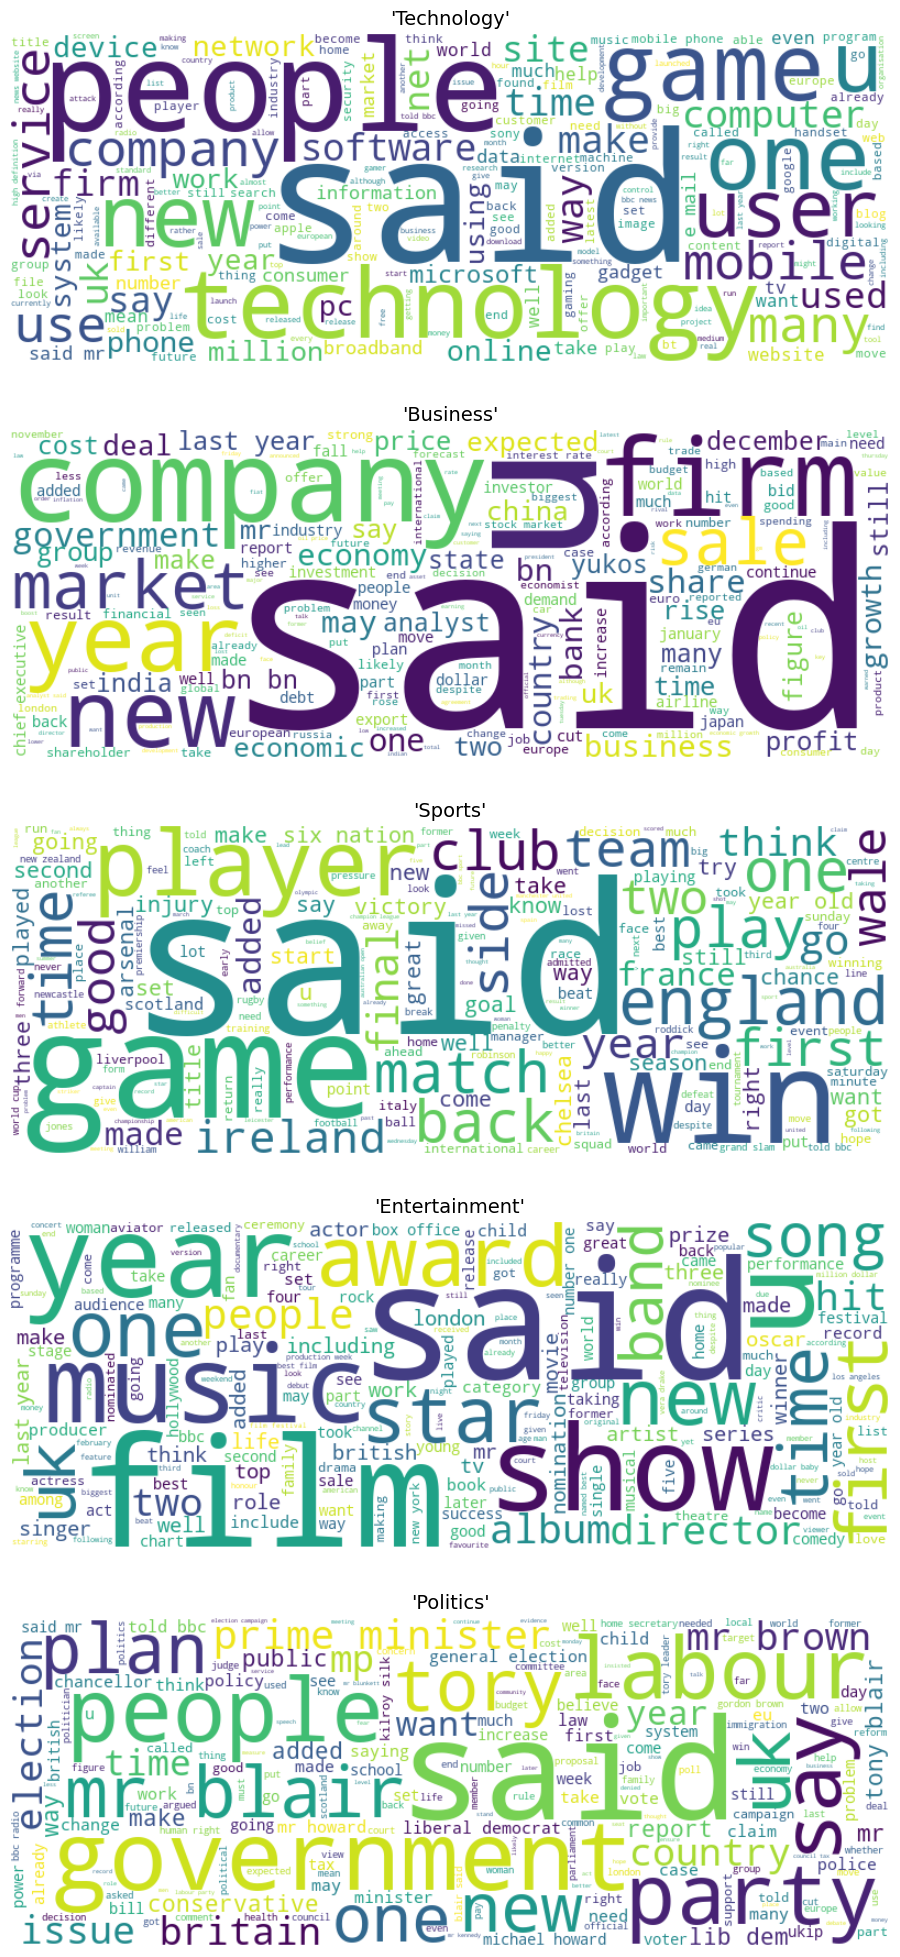

In [9]:
show_wordclouds_by_category(df)


In [10]:
# Encoding and Transforming Data
le = LabelEncoder()
df['Encoded_Category'] = le.fit_transform(df['Category'])


In [11]:
# vectorization
def vectorize_text(data, method='bow'):
    if method == 'bow':
        vectorizer = CountVectorizer(max_features=5000)
    else:
        vectorizer = TfidfVectorizer(max_features=5000)
    
    X = vectorizer.fit_transform(data).toarray()
    return X


In [12]:
X = vectorize_text(df['Processed_Article'], method='tfidf') # method='bow' or 'tfidf'
y = df['Encoded_Category']


In [13]:
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1668, 5000)
Test shape: (557, 5000)


Naive Bayes Train Accuracy: 0.9892
Naive Bayes Test Accuracy: 0.9695

Classification Report (Test Data):
               precision    recall  f1-score   support

     Business       0.97      0.96      0.96       136
Entertainment       1.00      0.93      0.96        96
     Politics       0.92      0.98      0.95        98
       Sports       0.98      1.00      0.99       124
   Technology       0.97      0.98      0.98       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



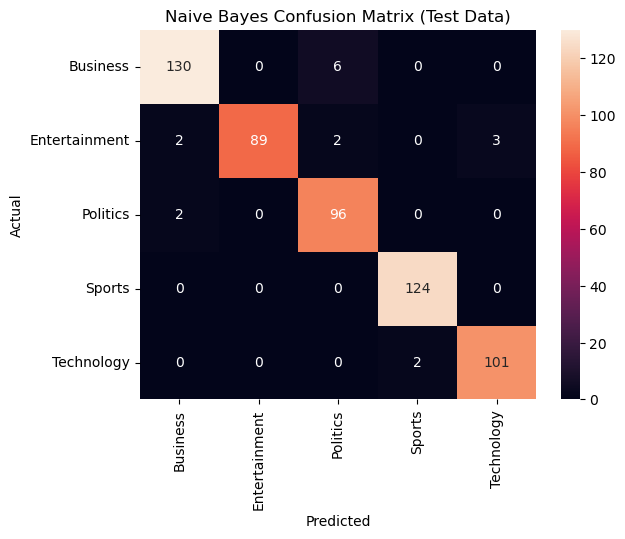

In [14]:
# NB Model training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Naive Bayes Train Accuracy: {train_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {test_accuracy:.4f}\n")

# Classification report (on test data)
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Confusion matrix (on test data)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Naive Bayes Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.8025

Classification Report (Test Data - Decision Tree):
               precision    recall  f1-score   support

     Business       0.79      0.79      0.79       136
Entertainment       0.84      0.80      0.82        96
     Politics       0.74      0.78      0.76        98
       Sports       0.82      0.87      0.85       124
   Technology       0.82      0.77      0.79       103

     accuracy                           0.80       557
    macro avg       0.80      0.80      0.80       557
 weighted avg       0.80      0.80      0.80       557



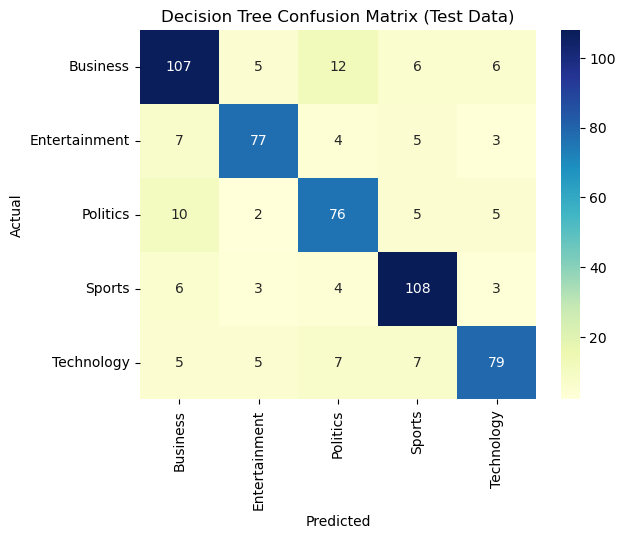

In [15]:
# DT
from sklearn.tree import DecisionTreeClassifier

# Model training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"Decision Tree Train Accuracy: {train_accuracy_dt:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.4f}\n")

# Classification Report
print("Classification Report (Test Data - Decision Tree):")
print(classification_report(y_test, y_test_pred_dt, target_names=le.classes_))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title('Decision Tree Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\VEERANNA\anaconda3\envs\flipitnews\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\VEERANNA\anaconda3\envs\flipitnews\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\VEERANNA\anaconda3\envs\flipitnews\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\VEERANNA\anaconda3\envs\flipitnews\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\VEERANNA\anaconda3\envs\flipitnews\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pi

KNN Train Accuracy: 0.9604
KNN Test Accuracy: 0.9390

Classification Report (Test Data - KNN):
               precision    recall  f1-score   support

     Business       0.95      0.89      0.92       136
Entertainment       0.95      0.95      0.95        96
     Politics       0.85      0.90      0.88        98
       Sports       0.97      1.00      0.98       124
   Technology       0.97      0.96      0.97       103

     accuracy                           0.94       557
    macro avg       0.94      0.94      0.94       557
 weighted avg       0.94      0.94      0.94       557



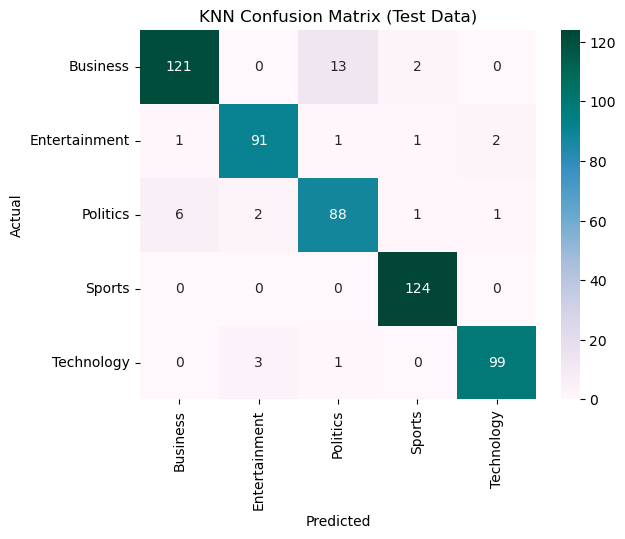

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Model training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"KNN Train Accuracy: {train_accuracy_knn:.4f}")
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}\n")

# Classification Report
print("Classification Report (Test Data - KNN):")
print(classification_report(y_test, y_test_pred_knn, target_names=le.classes_))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='PuBuGn')
plt.title('KNN Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9551

Classification Report (Test Data - Random Forest):
               precision    recall  f1-score   support

     Business       0.92      0.95      0.93       136
Entertainment       0.99      0.94      0.96        96
     Politics       0.94      0.95      0.94        98
       Sports       0.97      0.99      0.98       124
   Technology       0.97      0.94      0.96       103

     accuracy                           0.96       557
    macro avg       0.96      0.95      0.96       557
 weighted avg       0.96      0.96      0.96       557



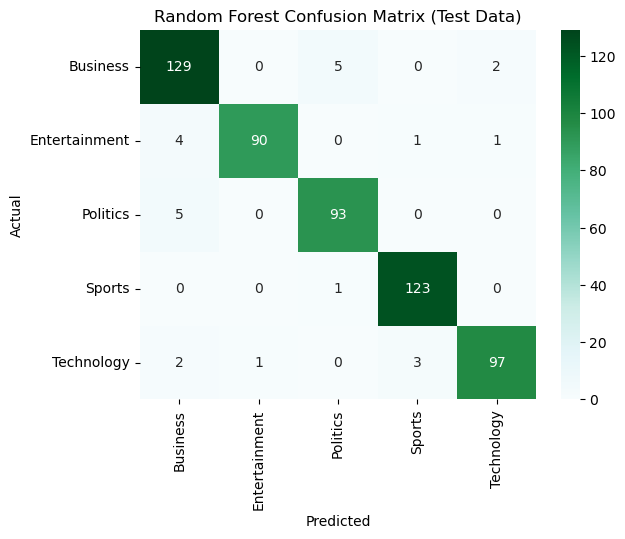

In [17]:
# RF
from sklearn.ensemble import RandomForestClassifier

# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}\n")

# Classification Report
print("Classification Report (Test Data - Random Forest):")
print(classification_report(y_test, y_test_pred_rf, target_names=le.classes_))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='BuGn')
plt.title('Random Forest Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
# Summary of model performances
model_summary = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'KNN', 'Random Forest'],
    'Train Accuracy': [train_accuracy, train_accuracy_dt, train_accuracy_knn, train_accuracy_rf],
    'Test Accuracy': [test_accuracy, test_accuracy_dt, test_accuracy_knn, test_accuracy_rf]
})

# Sort by Test Accuracy (optional)
model_summary = model_summary.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# Display summary
print("\nModel Performance Summary:")
display(model_summary)



Model Performance Summary:


,Model,Train Accuracy,Test Accuracy
0,Naive Bayes,0.989209,0.969479
1,Random Forest,1.000000,0.955117
2,KNN,0.960432,0.938959
3,Decision Tree,1.000000,0.802513


In [19]:
# How many news articles are present in the dataset
print("Number of articles:", len(df))


Number of articles: 2225


In [20]:
# Most of the news articles are from category:
print(df['Category'].value_counts().idxmax())


Sports


In [21]:
# no. of articles belong to the ‘Technology’ category
print(df['Category'].value_counts()['Technology'])


401


### What are Stop Words and why should they be removed from the text data?

Stop words are common words (like 'the', 'is', 'in') that add little semantic value. Removing them helps models focus on meaningful words.

### Difference between Stemming and Lemmatization.

Stemming trims words crudely (e.g., "running" → "run"), potentially producing incorrect stems. Lemmatization correctly reduces words based on their linguistic roots and context ("running" → "run").

### Which of the techniques Bag of Words or TF-IDF is considered more efficient?

TF-IDF is more efficient because it accounts for term importance across documents, unlike Bag of Words, which just counts term frequency.

In [22]:
# Shape of train & test data after 75:25 split
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


X_train shape: (1668, 5000) X_test shape: (557, 5000)


### Best performing model

Naive Bayes appears better as train accuracy and test accuracy are high and very close indicating there is not much overfitting (slight overfitting).

KKNN also shows similar trends with train and test accuracies.

Both RF and DT are showing 100% accuracy for training data where as accuracy on test data are lower indicating that there is overfit problem in both the cases. Decision tree test accuracy is much smaller (80%).